In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

In [2]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
epochs = 20

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [9]:
# Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train - ',x_train.shape)
print('Test - ',x_test.shape)
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.
print('Flatten Train - ',x_train.shape)
print('Flatten Test - ',x_test.shape)

Train -  (60000, 28, 28)
Test -  (10000, 28, 28)
Flatten Train -  (60000, 784)
Flatten Test -  (10000, 784)


In [5]:
y_train[0]

5

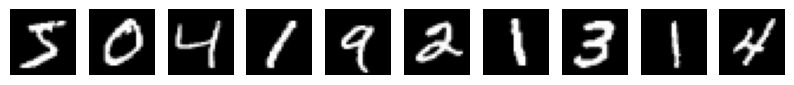

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
y_train[0]

5

In [11]:
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [12]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Logistics Regression

In [ ]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=epochs)
logreg.fit(x_train,y_train)# fit the model
print('c',logreg.intercept_.shape) # see the intercept
print('m',logreg.coef_.shape)# see the betas
print('Train Score r2 = ',logreg.score(x_train, y_train))
print('Test Score r2 = ',logreg.score(x_test, y_test))

print('Total Number of W nd B = ', logreg.intercept_.shape[0] * logreg.coef_.shape[1])

/Users/sandipan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c (10,)
m (10, 784)
Train Score r2 =  0.9106
Test Score r2 =  0.913
Total Number of W nd B =  7840


[5 0 4 1 9]


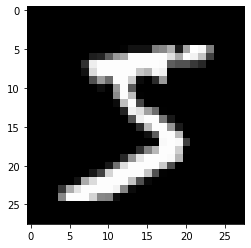

Model prediction: 5


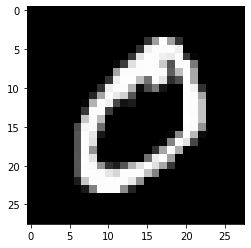

Model prediction: 0


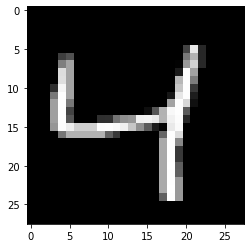

Model prediction: 4


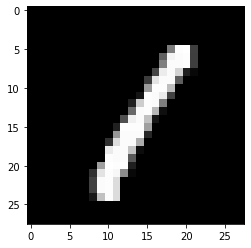

Model prediction: 1


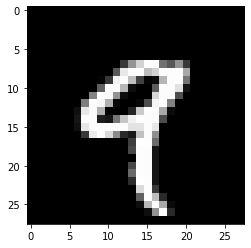

Model prediction: 9


In [ ]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_train[:n_images]
predictions = logreg.predict(test_images)
print(predictions)

# Display image and model prediction.
for i in range(n_images):
    pyplot.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    pyplot.show()
    print("Model prediction: %i" % predictions[i])

# ANN

In [15]:
# build NN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
# model.add(BatchNorm())
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [ ]:
# Training parameters.
learning_rate = 0.1
batch_size = 256
epochs = 20

In [ ]:
history = model.fit(x_train, y_train_ohe,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test_ohe))
# Model Eval
score = model.evaluate(x_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
235/235 [==============================] - 9s 34ms/step - loss: 1.6899 - accuracy: 0.6331 - val_loss: 0.9427 - val_accuracy: 0.8153
Epoch 2/20
235/235 [==============================] - 7s 28ms/step - loss: 0.6690 - accuracy: 0.8473 - val_loss: 0.4886 - val_accuracy: 0.8772
Epoch 3/20
235/235 [==============================] - 8s 33ms/step - loss: 0.4462 - accuracy: 0.8825 - val_loss: 0.3881 - val_accuracy: 0.8932
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.3751 - accuracy: 0.8971 - val_loss: 0.3368 - val_accuracy: 0.9055
Epoch 5/20
235/235 [==============================] - 8s 33ms/step - loss: 0.3377 - accuracy: 0.9057 - val_loss: 0.3135 - val_accuracy: 0.9081
Epoch 6/20
235/235 [==============================] - 7s 28ms/step - loss: 0.3131 - accuracy: 0.9116 - val_loss: 0.2907 - val_accuracy: 0.9167
Epoch 7/20
235/235 [==============================] - 8s 32ms/step - loss: 0.2947 - accuracy: 0.9167 - val_loss: 0.2781 - val_accuracy: 0.9192

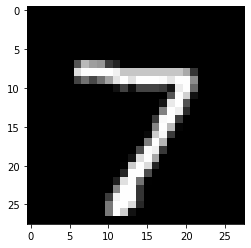

Model prediction: 7


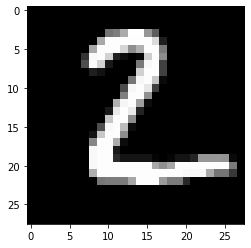

Model prediction: 2


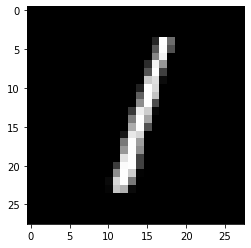

Model prediction: 1


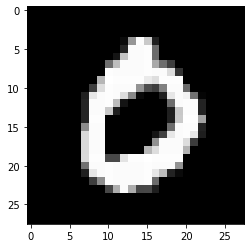

Model prediction: 0


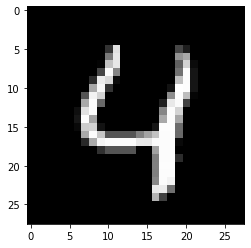

Model prediction: 4


In [ ]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# Display image and model prediction.
for i in range(n_images):
    pyplot.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    pyplot.show()
    print("Model prediction: %i" % np.argmax(predictions[i]))

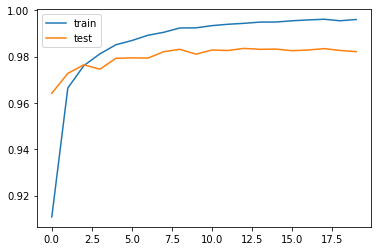

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()